# Introduction



# Starter Code

## Data Preparation


In [14]:
import numpy as np
import pandas as pd
import keras
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import metrics
import csv
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN

TARGET = 'project_is_approved'
EXCLUDE_FEATURES = ['id', 'school_state', 'project_subject_subcategories']

In [15]:
# read data sets
trainset = pd.read_csv('E:/DonorsChooseProject/outputs/train.csv')
validset = pd.read_csv('E:/DonorsChooseProject/outputs/test.csv')

In [16]:
# create x matrix and y vector
EXCLUDE_FEATURES.append(TARGET)
features = [var for var in list(trainset) if var not in EXCLUDE_FEATURES]

y = pd.get_dummies(trainset.loc[:, TARGET])['Approved']
y_valid = pd.get_dummies(validset.loc[:, TARGET])['Approved']
x = trainset.loc[:, features]
x_valid = validset.loc[:, features]

In [17]:
# split x to train/test
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size = .2,
                                                    random_state = 2911)
del x, y

In [18]:
# # standard scaler from the trainset
# scaler = preprocessing.StandardScaler().fit(x_train)

# # apply to x_train and x_test
# x_train = scaler.transform(x_train)
# x_test = scaler.transform(x_test)
# x_valid = scaler.transform(x_valid)

In [19]:
# apply smote
sm = SMOTE(random_state = 2911)
x_train_res, y_train_res = sm.fit_sample(x_train, y_train)

## Sample Model Code

```
fashion_model = Sequential()
fashion_model.add(Conv2D(12, kernel_size=(3, 3), strides=2,
                 activation='relu',
                 input_shape=(img_rows, img_cols, 1)))
fashion_model.add(Conv2D(12, (3, 3), strides=2, activation='relu'))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='relu'))
fashion_model.add(Dense(num_classes, activation='softmax'))

fashion_model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

fashion_model.fit(train_x, train_y,
          batch_size=batch_size,
          epochs=epochs,
          validation_split = 0.2)
```

# Specify the model
Specify, compile and fit a model `donor_model`.

In [26]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, Dropout

# model <- keras_model_sequential() 
# model %>% 
#   layer_dense(units = 256, activation = 'relu', input_shape = c(n_features), kernel_initializer = 'glorot_uniform') %>% 
#   layer_dropout(rate = 0) %>%
#   layer_dense(units = 128, activation = 'relu', kernel_initializer = 'glorot_uniform') %>% 
#   layer_dropout(rate = 0) %>%
#   layer_dense(units = 64, activation = 'relu', kernel_initializer = 'glorot_uniform') %>% 
#   layer_dropout(rate = 0) %>%
#   layer_dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid')

def donor_model():
    donor_model = Sequential()
    # Specify the rest of the model
#     donor_model.add(Dense(512, activation = 'relu', input_dim = x_train.shape[1]))
#     Dropout(0.5)
    donor_model.add(Dense(256, activation = 'relu', input_dim = x_train.shape[1]))
    Dropout(0.5)
#     donor_model.add(Dense(128, activation = 'relu'))
#     Dropout(0.5)
#     donor_model.add(Dense(64, activation = 'relu'))
#     Dropout(0.5)
#     donor_model.add(Dense(32, activation = 'relu'))
#     Dropout(0.5)
#     donor_model.add(Dense(16, activation = 'relu'))
#     Dropout(0.5)
#     donor_model.add(Dense(8, activation = 'relu'))
    donor_model.add(Dense(1, activation = 'sigmoid'))

    # Compile the model
    donor_model.compile(loss = keras.losses.binary_crossentropy,
                        optimizer = keras.optimizers.Adam(lr = 0.00001), # lr = 0.000001),
                        metrics = ['accuracy'])
    
    return donor_model


In [38]:
# https://machinelearningmastery.com/use-keras-deep-learning-models-scikit-learn-python/
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline


# sm = SMOTE(random_state = 2911)
# smote_enn = SMOTEENN(smote = sm)

estimators = []
estimators.append(('standardize', preprocessing.StandardScaler()))
estimators.append(('rnn', KerasClassifier(build_fn = donor_model, epochs = 12, batch_size = 100, verbose = 2))) # epochs = 50

pipeline = Pipeline(estimators)

# # evaluate using 10-fold cross validation
# kfold = StratifiedKFold(n_splits = 3, shuffle = True, random_state = 2911)
# results = cross_val_score(pipeline, x_train_res, y_train_res, cv = kfold)

# print("Standardized: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

In [39]:
pipeline_fit = pipeline.fit(x_train_res, y_train_res)

Epoch 1/12
 - 3s - loss: 0.8635 - acc: 0.5441
Epoch 2/12
 - 2s - loss: 0.7068 - acc: 0.6182
Epoch 3/12
 - 3s - loss: 0.6403 - acc: 0.6592
Epoch 4/12
 - 3s - loss: 0.6090 - acc: 0.6788
Epoch 5/12
 - 3s - loss: 0.5912 - acc: 0.6911
Epoch 6/12
 - 3s - loss: 0.5784 - acc: 0.7000
Epoch 7/12
 - 3s - loss: 0.5681 - acc: 0.7083
Epoch 8/12
 - 3s - loss: 0.5593 - acc: 0.7154
Epoch 9/12
 - 3s - loss: 0.5515 - acc: 0.7217
Epoch 10/12
 - 3s - loss: 0.5445 - acc: 0.7276
Epoch 11/12
 - 3s - loss: 0.5381 - acc: 0.7325
Epoch 12/12
 - 3s - loss: 0.5320 - acc: 0.7371


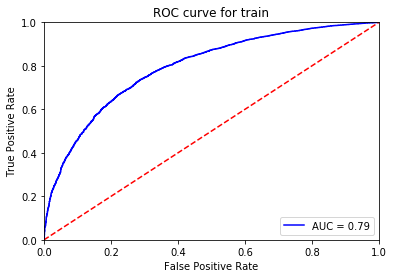

In [40]:
predict_train = pipeline.predict_proba(x_train)[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_train, predict_train)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('ROC curve for train')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

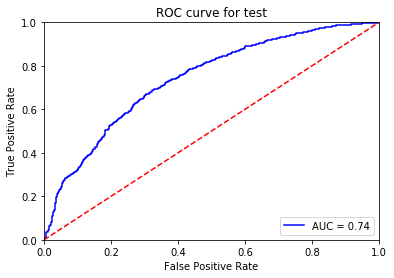

In [41]:
predict_test = pipeline.predict_proba(x_test)[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, predict_test)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('ROC curve for test')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

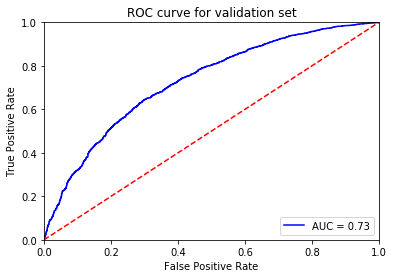

In [42]:
predict_valid = pipeline.predict_proba(x_valid)[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_valid, predict_valid)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('ROC curve for validation set')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Predict data for submission



In [43]:
# release memory
del trainset, validset, x_train, x_test, x_valid, y_train, y_test, y_valid

In [44]:
# load data
submission = pd.read_csv('C:/Users/Python/Documents/DonorsChooseProject/data/submission_data.csv', low_memory = False)

In [45]:
# predict probabilities
x_submission = submission.loc[:, features]
submission = submission.loc[:, ['id']]

In [46]:
submission = submission.assign(project_is_approved = pipeline.predict_proba(x_submission)[:, 1])

In [47]:
# write csv 
submission.to_csv('C:/Users/Python/Documents/DonorsChooseProject/submission.csv', index = False)

# Load all data

In [ ]:
def read_csv(filename, print_every = 1000):
    csv_data = []
    f = open(filename, 'r')
    csv_file = csv.DictReader(f)
    i = 1
    for row in csv_file:
        csv_data.append(row)
        if i % print_every == 0:
            print('Row # ' + i + ' read.')
        i += 1
    f.close()
    return csv_data

In [ ]:
train = pd.read_csv('../data/train.csv')

In [ ]:
test = pd.read_csv('../data/test.csv')

In [ ]:
resources = pd.read_csv('../data/resources.csv')